1. Importing Libraries
2. Loading data
3. making some new features 
4. displaying 5 rows from data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('train_sample.csv')

# Data Cleaning
data['click_time'] = pd.to_datetime(data['click_time'])
data['attributed_time'] = pd.to_datetime(data['attributed_time'])
data['hour'] = data['click_time'].dt.hour
data['minute'] = data['click_time'].dt.minute
data['second'] = data['click_time'].dt.second
data['day'] = data['click_time'].dt.day
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,hour,minute,second,day
0,89489,3,1,13,379,2017-11-06 15:13:23,NaT,0,15,13,23,6
1,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1,15,41,7,6
2,3437,6,1,13,459,2017-11-06 15:42:32,NaT,0,15,42,32,6
3,167543,3,1,13,379,2017-11-06 15:56:17,NaT,0,15,56,17,6
4,147509,3,1,13,379,2017-11-06 15:57:01,NaT,0,15,57,1,6


### Summary statistics for numeric columns

In [2]:
# Data Distribution and Summary
data.describe()

,ip,app,device,os,channel,is_attributed,hour,minute,second,day
count,2.300561e+06,2.300561e+06,2.300561e+06,2.300561e+06,2.300561e+06,2.300561e+06,2.300561e+06,2.300561e+06,2.300561e+06,2.300561e+06
mean,1.056052e+05,1.550743e+01,2.348307e+01,2.297843e+01,2.562431e+02,1.985803e-01,9.160539e+00,2.934901e+01,2.955570e+01,7.867650e+00
std,8.339342e+04,2.108502e+01,2.501862e+02,5.483919e+01,1.291065e+02,3.989313e-01,6.120964e+00,1.738031e+01,1.725196e+01,8.867873e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
25%,4.383700e+04,3.000000e+00,1.000000e+00,1.300000e+01,1.370000e+02,0.000000e+00,4.000000e+00,1.400000e+01,1.500000e+01,7.000000e+00
50%,8.749800e+04,1.200000e+01,1.000000e+00,1.800000e+01,2.450000e+02,0.000000e+00,9.000000e+00,2.900000e+01,3.000000e+01,8.000000e+00
75%,1.387450e+05,1.800000e+01,1.000000e+00,2.000000e+01,3.490000e+02,0.000000e+00,1.300000e+01,4.400000e+01,4.400000e+01,9.000000e+00
max,3.647780e+05,7.680000e+02,4.223000e+03,9.110000e+02,4.980000e+02,1.000000e+00,2.300000e+01,5.900000e+01,5.900000e+01,9.000000e+00


#### Top 5 operating systems in our dataset 

<AxesSubplot:>

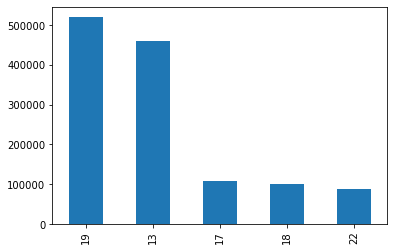

In [3]:
data['os'].value_counts()[:5].plot(kind = 'bar')

#### Top 10 apps in our dataset

<AxesSubplot:>

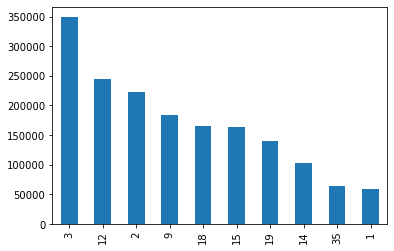

In [4]:
data['app'].value_counts()[:10].plot(kind = 'bar')

#### Top 5 channels as per our dataset

<AxesSubplot:>

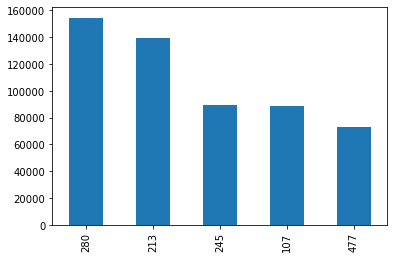

In [5]:
data['channel'].value_counts()[:5].plot(kind = 'bar')

#### Heatmap to check corelations between features

<AxesSubplot:>

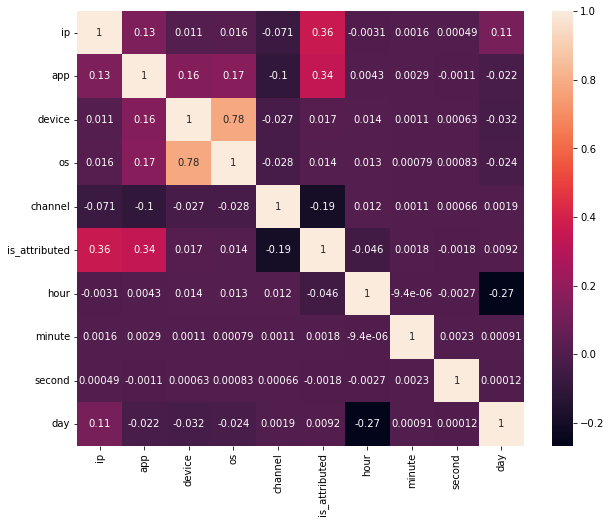

In [6]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True)

#### Checking number of unique values per feature

In [7]:
for i in data.columns:
    print(i, data[i].nunique())

ip 260238
app 389
device 1918
os 232
channel 181
click_time 251267
attributed_time 182057
is_attributed 2
hour 24
minute 60
second 60
day 4


#### Checking null values

In [8]:
data.isnull().sum()*100/len(data)

ip                  0.000000
app                 0.000000
device              0.000000
os                  0.000000
channel             0.000000
click_time          0.000000
attributed_time    80.141974
is_attributed       0.000000
hour                0.000000
minute              0.000000
second              0.000000
day                 0.000000
dtype: float64

#### dropping attributed_time because it contains 80% missing values

In [9]:
data.drop(columns = ['device', 'attributed_time'], axis = 1, inplace = True)

#### visualising Hour, minute, second and day columns against is_attributed feature

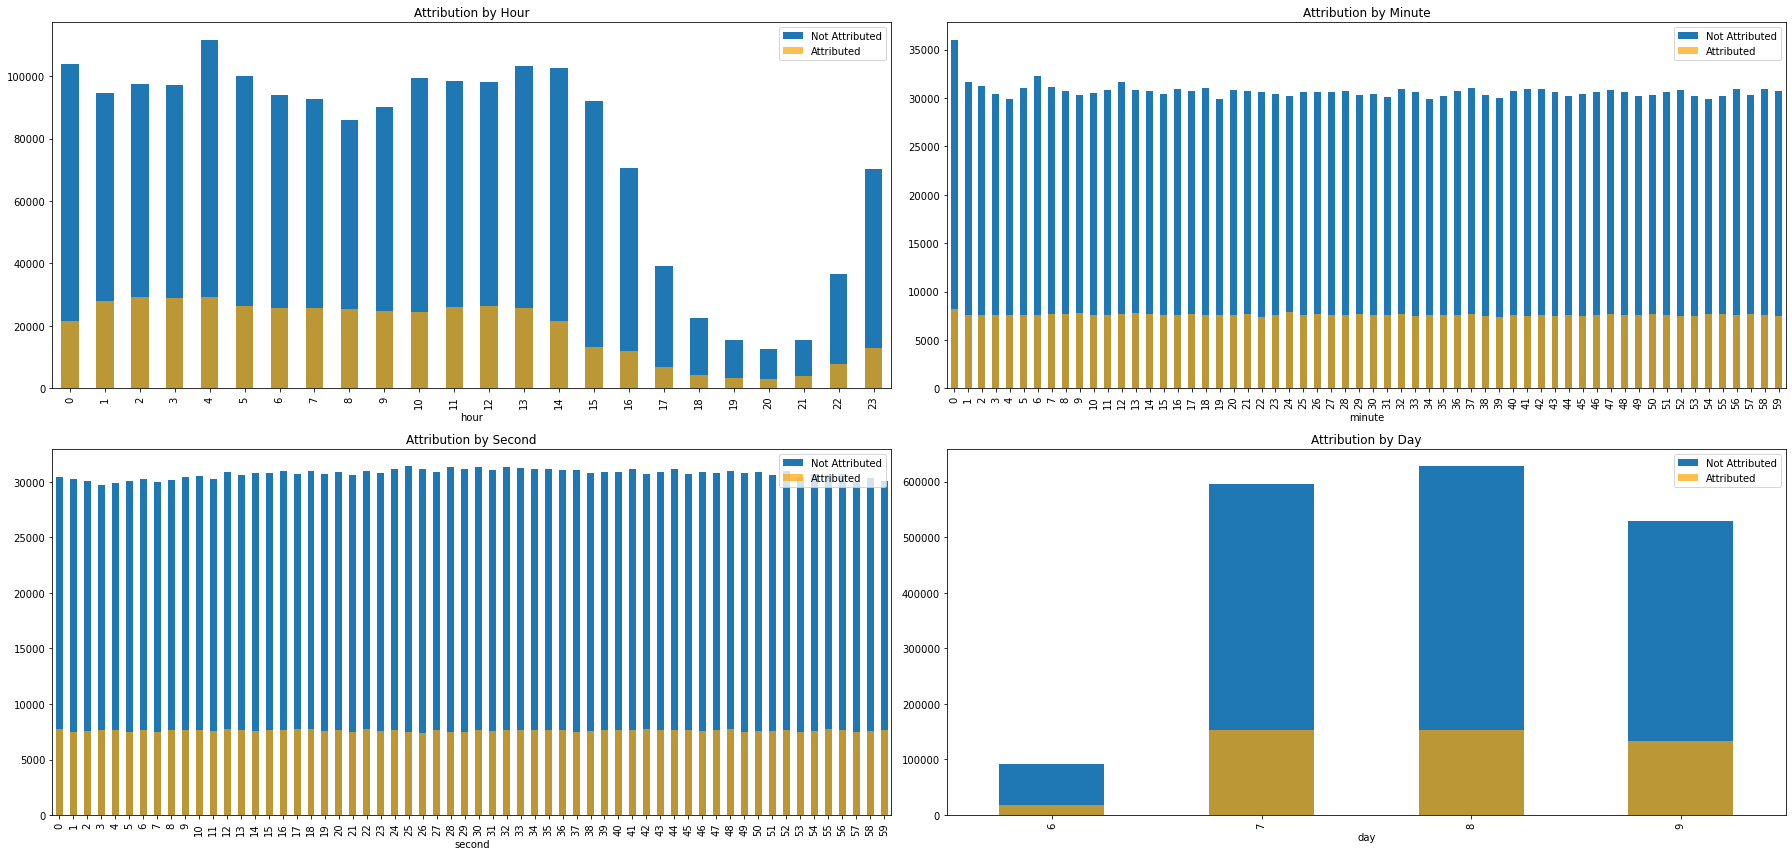

In [13]:
# Filter data for is_attributed values 0 and 1
data_0 = data[data['is_attributed'] == 0]
data_1 = data[data['is_attributed'] == 1]

# Group by hour, minute, second, and day and calculate the counts for 0 and 1
grouped_0 = data_0.groupby(['hour', 'minute', 'second', 'day'])['is_attributed'].count().reset_index()
grouped_1 = data_1.groupby(['hour', 'minute', 'second', 'day'])['is_attributed'].count().reset_index()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 12))

# Stacked bar chart for hour
hourly_group_0 = grouped_0.groupby('hour')['is_attributed'].sum()
hourly_group_1 = grouped_1.groupby('hour')['is_attributed'].sum()
hourly_group_0.plot(kind='bar', stacked=True, ax=axes[0, 0], label='Not Attributed')
hourly_group_1.plot(kind='bar', stacked=True, ax=axes[0, 0], label='Attributed', color='orange', alpha=0.7)
axes[0, 0].set_title('Attribution by Hour')
axes[0, 0].legend()

# Stacked bar chart for minute
minute_group_0 = grouped_0.groupby('minute')['is_attributed'].sum()
minute_group_1 = grouped_1.groupby('minute')['is_attributed'].sum()
minute_group_0.plot(kind='bar', stacked=True, ax=axes[0, 1], label='Not Attributed')
minute_group_1.plot(kind='bar', stacked=True, ax=axes[0, 1], label='Attributed', color='orange', alpha=0.7)
axes[0, 1].set_title('Attribution by Minute')
axes[0, 1].legend()

# Stacked bar chart for second
second_group_0 = grouped_0.groupby('second')['is_attributed'].sum()
second_group_1 = grouped_1.groupby('second')['is_attributed'].sum()
second_group_0.plot(kind='bar', stacked=True, ax=axes[1, 0], label='Not Attributed')
second_group_1.plot(kind='bar', stacked=True, ax=axes[1, 0], label='Attributed', color='orange', alpha=0.7)
axes[1, 0].set_title('Attribution by Second')
axes[1, 0].legend()

# Stacked bar chart for day
day_group_0 = grouped_0.groupby('day')['is_attributed'].sum()
day_group_1 = grouped_1.groupby('day')['is_attributed'].sum()
day_group_0.plot(kind='bar', stacked=True, ax=axes[1, 1], label='Not Attributed')
day_group_1.plot(kind='bar', stacked=True, ax=axes[1, 1], label='Attributed', color='orange', alpha=0.7)
axes[1, 1].set_title('Attribution by Day')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

#### Plotting histograms of few numerical columns 

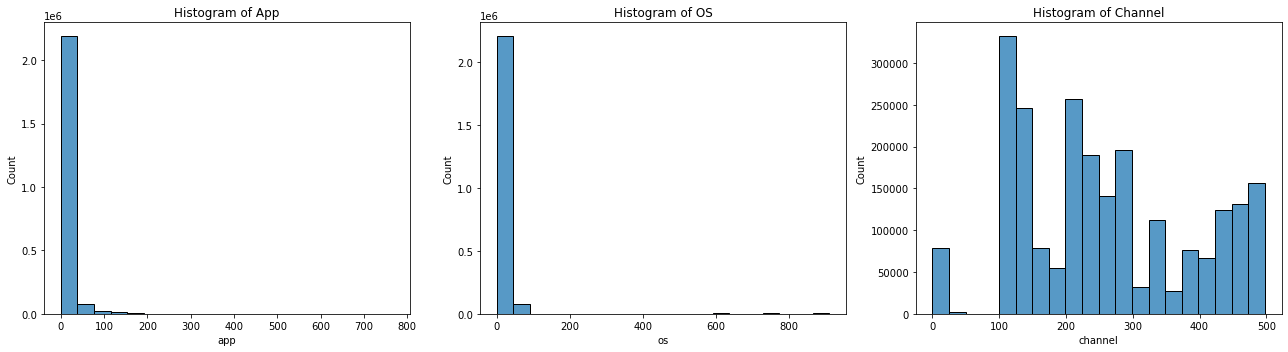

In [14]:
import warnings
warnings.filterwarnings("ignore")

# Create subplots for histograms
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Histogram for 'app'
sns.histplot(data['app'], bins=20, kde=False, ax=axes[0])
axes[0].set_title('Histogram of App')

# Histogram for 'os'
sns.histplot(data['os'], bins=20, kde=False, ax=axes[1])
axes[1].set_title('Histogram of OS')

# Histogram for 'channel'
sns.histplot(data['channel'], bins=20, kde=False, ax=axes[2])
axes[2].set_title('Histogram of Channel')

plt.tight_layout()
plt.show()

### Filtering data based on above graph 

In [15]:
data = data[(data['os']<= 100) & (data['app']<= 100)]
data.head()

,ip,app,os,channel,click_time,is_attributed,hour,minute,second,day,month
0,89489,3,13,379,2017-11-06 15:13:23,0,15,13,23,6,11
1,204158,35,13,21,2017-11-06 15:41:07,1,15,41,7,6,11
2,3437,6,13,459,2017-11-06 15:42:32,0,15,42,32,6,11
3,167543,3,13,379,2017-11-06 15:56:17,0,15,56,17,6,11
4,147509,3,13,379,2017-11-06 15:57:01,0,15,57,1,6,11


### Plotting histograms of same columns after filltering data

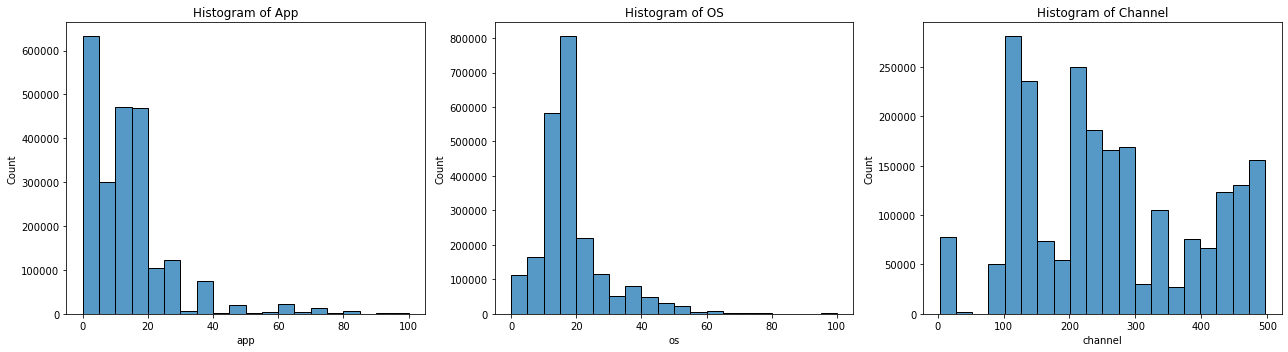

In [16]:
# Create subplots for histograms
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Histogram for 'app'
sns.histplot(data['app'], bins=20, kde=False, ax=axes[0])
axes[0].set_title('Histogram of App')

# Histogram for 'os'
sns.histplot(data['os'], bins=20, kde=False, ax=axes[1])
axes[1].set_title('Histogram of OS')

# Histogram for 'channel'
sns.histplot(data['channel'], bins=20, kde=False, ax=axes[2])
axes[2].set_title('Histogram of Channel')

plt.tight_layout()
plt.show()

In [17]:
data.shape

(2261728, 11)

#### again filtering data based on above graph

In [18]:
data = data[(data['os']<= 60) & (data['app']<= 60)]

#### plotting histograms after filtering data

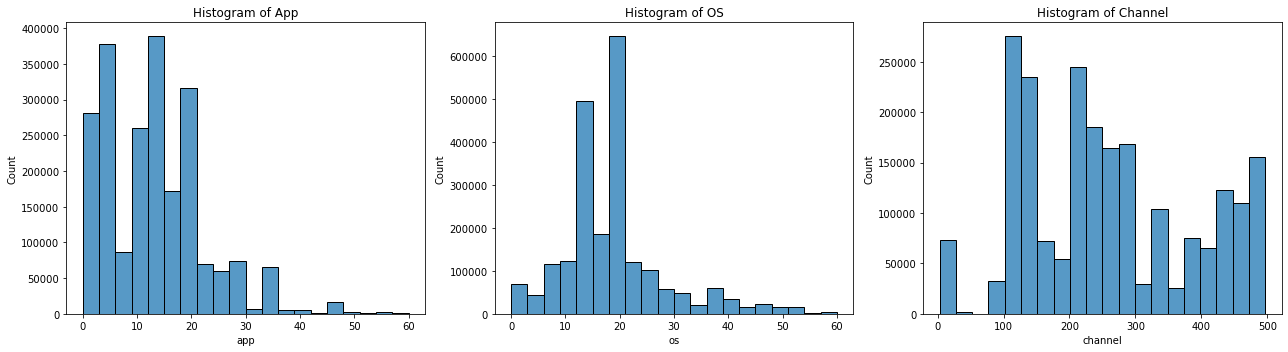

In [19]:
# Create subplots for histograms
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Histogram for 'app'
sns.histplot(data['app'], bins=20, kde=False, ax=axes[0])
axes[0].set_title('Histogram of App')

# Histogram for 'os'
sns.histplot(data['os'], bins=20, kde=False, ax=axes[1])
axes[1].set_title('Histogram of OS')

# Histogram for 'channel'
sns.histplot(data['channel'], bins=20, kde=False, ax=axes[2])
axes[2].set_title('Histogram of Channel')

plt.tight_layout()
plt.show()

In [20]:
data.shape

(2196368, 11)

In [41]:
data['is_attributed'].value_counts()*100/len(data)

0    81.711034
1    18.288966
Name: is_attributed, dtype: float64

#### Extracting X and y 

In [22]:
X = data.drop(columns = ['is_attributed', 'click_time'])
y = data['is_attributed']

In [23]:
print(X.shape)
print(y.shape)

(2196368, 9)
(2196368,)


#### Splitting data into train and test set

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1757094, 9)
(439274, 9)
(1757094,)
(439274,)


#### Standardizing features

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### making logistic regression classifer 

In [27]:
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)

LogisticRegression()

In [28]:
from sklearn.metrics import accuracy_score

y_train_pred_lr = lr.predict(x_train_scaled)
y_test_pred_lr = lr.predict(x_test_scaled)

train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

print("Logistic Regression - Train Accuracy:", train_accuracy_lr)
print("Logistic Regression - Test Accuracy:", test_accuracy_lr)

Logistic Regression - Train Accuracy: 0.8714633366228557
Logistic Regression - Test Accuracy: 0.8717975568779395


#### Insight 
accuracy of logistic model seems very low 

#### Action 
need to make new classifier models

#### making a Decision Tree classifier

In [29]:
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)


y_train_pred_dt = dt.predict(x_train_scaled)
y_test_pred_dt = dt.predict(x_test_scaled)

train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

print("DecisionTreeClassifier - Train Accuracy:", train_accuracy_dt)
print("DecisionTreeClassifier - Test Accuracy:", test_accuracy_dt)

DecisionTreeClassifier - Train Accuracy: 0.9999635762230137
DecisionTreeClassifier - Test Accuracy: 0.9246119733924612


#### Insights 
This model is performing really good on Train data but accuracy is fropping on Test data which is a sign of overfitting 

#### Action 
We will do hyperparameter tuning

#### Hyperparameter tuning for Logistic regression

In [30]:
lr = LogisticRegression(penalty = 'l2', max_iter = 500, C = 0.24770763559917114)
lr.fit(x_train_scaled, y_train)

y_train_pred_lr = lr.predict(x_train_scaled)
y_test_pred_lr = lr.predict(x_test_scaled)

train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

print("Logistic Regression - Train Accuracy:", train_accuracy_lr)
print("Logistic Regression - Test Accuracy:", test_accuracy_lr)

Logistic Regression - Train Accuracy: 0.8714644748658865
Logistic Regression - Test Accuracy: 0.8717975568779395


#### Insights 
Model performance hasn't changed 

#### Hyperparameter tuning on Decision Tree classifier 

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define the range of hyperparameters to search
max_depth_values = [10, 20, 30]
min_samples_split_values = np.arange(2, 11)

best_accuracy = 0
best_params = {}

# Loop through all combinations of hyperparameters
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        # Initialize the Decision Tree model with current hyperparameters
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        
        # Train the model on the training set
        dt.fit(x_train, y_train)
        
        # Make predictions on the validation set
        y_val_pred = dt.predict(x_val)
        
        # Calculate accuracy on the validation set
        accuracy = accuracy_score(y_val, y_val_pred)
        
        # Check if this combination of hyperparameters is the best so far
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split}

# Train the best model using the best hyperparameters on the full training set
best_dt = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], random_state=42)
best_dt.fit(x_train, y_train)

# Make predictions on the training and testing sets using the best model
y_train_pred = best_dt.predict(x_train)
y_test_pred = best_dt.predict(x_test)

# Calculate accuracy of the best model on the train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Hyperparameters:", best_params)
print("Validation Accuracy (on the validation set):", best_accuracy)
print("Train Accuracy (on the full training set):", train_accuracy)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10}
Validation Accuracy (on the validation set): 0.9567923191403993
Train Accuracy (on the full training set): 0.957097479858431
Test Accuracy: 0.9561503753921243


#### Insight 
Train data accuracy has gone down but Test data accuracy has gone up and no overfitting is there 

In [32]:
best_hyperparameters = {'max_depth': 10, 'min_samples_split': 10}

# Create a Decision Tree classifier with the best hyperparameters
best_dt = DecisionTreeClassifier(max_depth=best_hyperparameters['max_depth'], 
                                 min_samples_split=best_hyperparameters['min_samples_split'], 
                                 random_state=42)

# Train the model on the full training set
best_dt.fit(x_train, y_train)

# Make predictions on the test set
y_test_pred = best_dt.predict(x_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9561503753921243


#### Making Confusion matrix

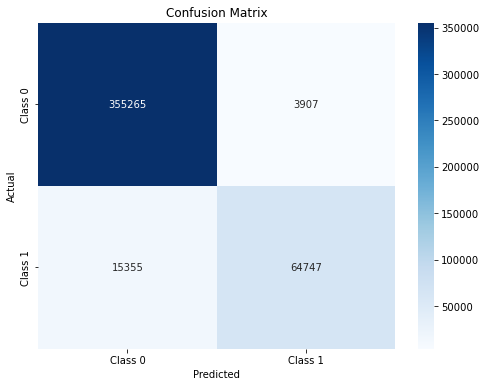

In [33]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Checking on other matrix 

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculate precision
precision = precision_score(y_test, y_test_pred)

# Calculate recall
recall = recall_score(y_test, y_test_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_test_pred)

# Generate a classification report which includes precision, recall, F1-score, and more
classification_rep = classification_report(y_test, y_test_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("\nClassification Report:\n", classification_rep)

Precision: 0.9430914440527864
Recall: 0.8083069086914184
F1-score: 0.8705127860388824

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    359172
           1       0.94      0.81      0.87     80102

    accuracy                           0.96    439274
   macro avg       0.95      0.90      0.92    439274
weighted avg       0.96      0.96      0.95    439274



#### Insights 
By looking at avove scores we can say that our models is working decently good for both 0 and 1 but recall is very low 

#### Making ROC curve

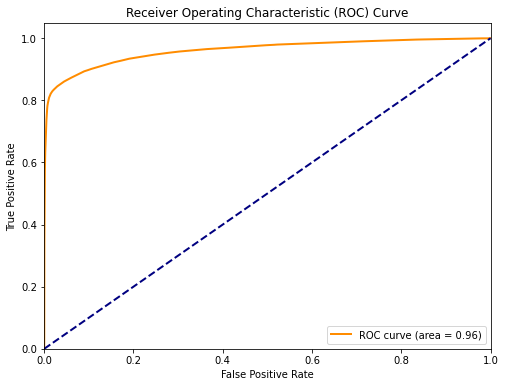

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_dt.predict_proba(x_test)[:, 1])  # Assuming 'best_dt' is your trained Decision Tree model

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, best_dt.predict_proba(x_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Since it is an unbalanced SMOTE can be used to bridge this gap

In [43]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming you have a feature matrix X and corresponding target labels y
# X should contain your features, and y should contain your binary class labels (0 or 1)

# Check the class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y))

# Instantiate the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution before SMOTE: Counter({0: 1794675, 1: 401693})
Class distribution after SMOTE: Counter({0: 1794675, 1: 1794675})


### Splitting our resampled data into train, test and validation dataset 

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

#### Hyperparameter tuning on validation dataset

In [51]:
max_depth_values = [10, 20, 30]
min_samples_split_values = np.arange(2, 11)

best_accuracy = 0
best_params = {}

# Loop through all combinations of hyperparameters
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        # Initialize the Decision Tree model with current hyperparameters
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        
        # Train the model on the training set
        dt.fit(x_train, y_train)
        
        # Make predictions on the validation set
        y_val_pred = dt.predict(x_val)
        
        # Calculate accuracy on the validation set
        accuracy = accuracy_score(y_val, y_val_pred)
        
        # Check if this combination of hyperparameters is the best so far
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split}

# Train the best model using the best hyperparameters on the full training set
best_dt = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], random_state=42)
best_dt.fit(x_train, y_train)

# Make predictions on the training and testing sets using the best model
y_train_pred = best_dt.predict(x_train)
y_test_pred = best_dt.predict(x_test)

# Calculate accuracy of the best model on the train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Hyperparameters:", best_params)
print("Validation Accuracy (on the validation set):", best_accuracy)
print("Train Accuracy (on the full training set):", train_accuracy)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 10}
Validation Accuracy (on the validation set): 0.9567940574198671
Train Accuracy (on the full training set): 0.9651403631576748
Test Accuracy: 0.9569852480254085


### Building ROC curve to visualize best threshold value

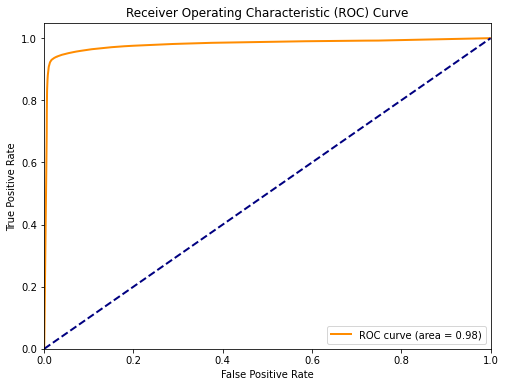

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_dt.predict_proba(x_test)[:, 1])  # Assuming 'best_dt' is your trained Decision Tree model

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, best_dt.predict_proba(x_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Getting our best threshold value

In [55]:
best_threshold = thresholds[np.argmax(tpr - fpr)]

print("Best Threshold:", best_threshold)

Best Threshold: 0.5877862595419847


#### building new decision tree classifier using this threshold

In [56]:
best_dt_with_threshold = DecisionTreeClassifier(
    max_depth=20, 
    min_samples_split=10, 
    random_state=42
)

# Train the model on the full training set
best_dt_with_threshold.fit(x_train, y_train)

# Make predictions on the test set
y_test_probs = best_dt_with_threshold.predict_proba(x_test)[:, 1]

# Apply the threshold to the predicted probabilities
threshold = 0.5877862595419847
y_test_pred_with_threshold = (y_test_probs > threshold).astype(int)

# Calculate accuracy on the test set with the adjusted threshold
test_accuracy_with_threshold = accuracy_score(y_test, y_test_pred_with_threshold)

print("Test Accuracy with Threshold:", test_accuracy_with_threshold)

Test Accuracy with Threshold: 0.9571147979439174


#### Visualizing confusion matrix

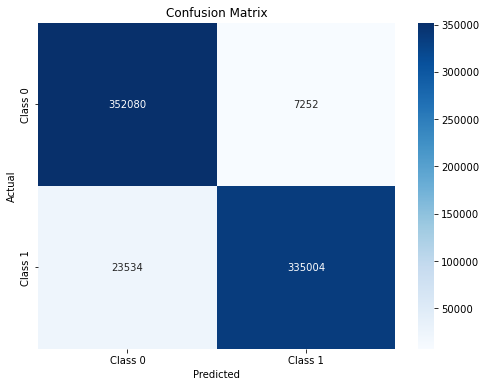

In [57]:
conf_matrix = confusion_matrix(y_test, y_test_pred_with_threshold)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Looking at other matrix

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculate precision
precision = precision_score(y_test, y_test_pred_with_threshold)

# Calculate recall
recall = recall_score(y_test, y_test_pred_with_threshold)

# Calculate F1-score
f1 = f1_score(y_test, y_test_pred_with_threshold)

# Generate a classification report which includes precision, recall, F1-score, and more
classification_rep = classification_report(y_test, y_test_pred_with_threshold)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("\nClassification Report:\n", classification_rep)

Precision: 0.9788111822729185
Recall: 0.9343612113639279
F1-score: 0.9560698293649773

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96    359332
           1       0.98      0.93      0.96    358538

    accuracy                           0.96    717870
   macro avg       0.96      0.96      0.96    717870
weighted avg       0.96      0.96      0.96    717870



#### comparision between old and new model

In [62]:
# <!-- ## for old model                                                        
                                                                        
# Precision: 0.9430914440527864                                              
# Recall: 0.8083069086914184
# F1-score: 0.8705127860388824

# Classification Report:
#                precision    recall  f1-score   support

#            0       0.96      0.99      0.97    359172
#            1       0.94      0.81      0.87     80102

#     accuracy                           0.96    439274
#    macro avg       0.95      0.90      0.92    439274
# weighted avg       0.96      0.96      0.95    439274


# ## for new model
# Precision: 0.9788111822729185
# Recall: 0.9343612113639279
# F1-score: 0.9560698293649773
# Classification Report:
#                precision    recall  f1-score   support

#            0       0.94      0.98      0.96    359332
#            1       0.98      0.93      0.96    358538

#     accuracy                           0.96    717870
#    macro avg       0.96      0.96      0.96    717870
# weighted avg       0.96      0.96      0.96    717870 -->

#### Insights
New model seems better as it has significant value of recall and there is slight increse in every matrix in comparision to the old model